In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import datetime
import math
import seaborn as sns #used for graphical visualization
import matplotlib
matplotlib.use('TkAgg')
from matplotlib import pyplot as plt
%matplotlib inline
import os
from scipy.stats import t
from scipy.stats import ttest_ind

df=pd.read_csv('flights.csv')  #opening the csv file
dt=df

In [2]:
#Task 1 - Exploratory Data Analysis
print("The dataset has ",df.shape[0]," rows and ",df.shape[1]," columns")

print("First 5 rows of data")
display(df.head())

print("Top 5 frequent destinations")
display(df['dest'].value_counts()[:5].sort_values(ascending=False))

print("Top 5 flights having longest air time")
display(df.nlargest(5, ['air_time']))

print("Top 5 flights with longest departure delays")
display(df.nlargest(5, ['dep_delay']))

print("Top 5 flights with longest arrival delays")
display(df.nlargest(5, ['arr_delay']))

#Function to check any NA values
def check_NullValues():
    out=df.isnull().sum()
    found=0
    for counter in out.index:
        if out[counter]>0:
            found=found+1
            print( "Column ", counter , " has ",out[counter] , "Null values")
    if(found==0):
        print("No Null values found in dataframe")
print("Columns with null values")
check_NullValues()

#Dropping columns with null values
df.dropna(axis=0,how ='any', inplace=True) 
df.drop(axis=1,columns=['dep_time','sched_dep_time','sched_arr_time','arr_time','time_hour'],inplace=True) # These rows are removed for ease of analysis
print("After removing some columns")
check_NullValues()

print('This dataset now has ',df.shape[0] , 'rows and ',df.shape[1],' columns')

The dataset has  336776  rows and  19  columns
First 5 rows of data


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T05:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T05:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T05:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T05:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T06:00:00Z


Top 5 frequent destinations


ORD    17283
ATL    17215
LAX    16174
BOS    15508
MCO    14082
Name: dest, dtype: int64

Top 5 flights having longest air time


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
151467,2013,3,17,1337.0,1335,2.0,1937.0,1836,61.0,UA,15,N77066,EWR,HNL,695.0,4963,13,35,2013-03-17T13:00:00Z
115752,2013,2,6,853.0,900,-7.0,1542.0,1540,2.0,HA,51,N389HA,JFK,HNL,691.0,4983,9,0,2013-02-06T09:00:00Z
149618,2013,3,15,1001.0,1000,1.0,1551.0,1530,21.0,HA,51,N388HA,JFK,HNL,686.0,4983,10,0,2013-03-15T10:00:00Z
151311,2013,3,17,1006.0,1000,6.0,1607.0,1530,37.0,HA,51,N380HA,JFK,HNL,686.0,4983,10,0,2013-03-17T10:00:00Z
150547,2013,3,16,1001.0,1000,1.0,1544.0,1530,14.0,HA,51,N384HA,JFK,HNL,683.0,4983,10,0,2013-03-16T10:00:00Z


Top 5 flights with longest departure delays


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
7072,2013,1,9,641.0,900,1301.0,1242.0,1530,1272.0,HA,51,N384HA,JFK,HNL,640.0,4983,9,0,2013-01-09T09:00:00Z
235778,2013,6,15,1432.0,1935,1137.0,1607.0,2120,1127.0,MQ,3535,N504MQ,JFK,CMH,74.0,483,19,35,2013-06-15T19:00:00Z
8239,2013,1,10,1121.0,1635,1126.0,1239.0,1810,1109.0,MQ,3695,N517MQ,EWR,ORD,111.0,719,16,35,2013-01-10T16:00:00Z
327043,2013,9,20,1139.0,1845,1014.0,1457.0,2210,1007.0,AA,177,N338AA,JFK,SFO,354.0,2586,18,45,2013-09-20T18:00:00Z
270376,2013,7,22,845.0,1600,1005.0,1044.0,1815,989.0,MQ,3075,N665MQ,JFK,CVG,96.0,589,16,0,2013-07-22T16:00:00Z


Top 5 flights with longest arrival delays


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
7072,2013,1,9,641.0,900,1301.0,1242.0,1530,1272.0,HA,51,N384HA,JFK,HNL,640.0,4983,9,0,2013-01-09T09:00:00Z
235778,2013,6,15,1432.0,1935,1137.0,1607.0,2120,1127.0,MQ,3535,N504MQ,JFK,CMH,74.0,483,19,35,2013-06-15T19:00:00Z
8239,2013,1,10,1121.0,1635,1126.0,1239.0,1810,1109.0,MQ,3695,N517MQ,EWR,ORD,111.0,719,16,35,2013-01-10T16:00:00Z
327043,2013,9,20,1139.0,1845,1014.0,1457.0,2210,1007.0,AA,177,N338AA,JFK,SFO,354.0,2586,18,45,2013-09-20T18:00:00Z
270376,2013,7,22,845.0,1600,1005.0,1044.0,1815,989.0,MQ,3075,N665MQ,JFK,CVG,96.0,589,16,0,2013-07-22T16:00:00Z


Columns with null values
Column  dep_time  has  8255 Null values
Column  dep_delay  has  8255 Null values
Column  arr_time  has  8713 Null values
Column  arr_delay  has  9430 Null values
Column  tailnum  has  2512 Null values
Column  air_time  has  9430 Null values
After removing some columns
No Null values found in dataframe
This dataset now has  327346 rows and  14  columns


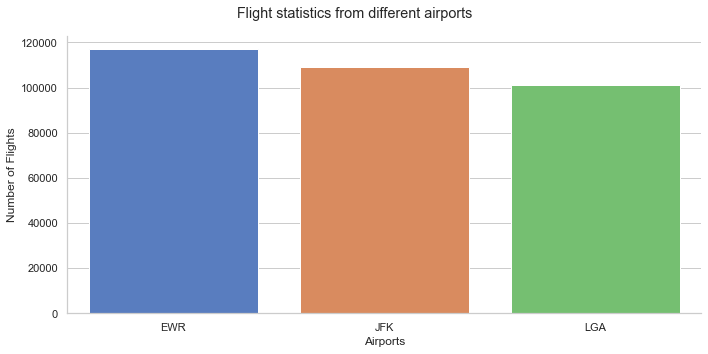

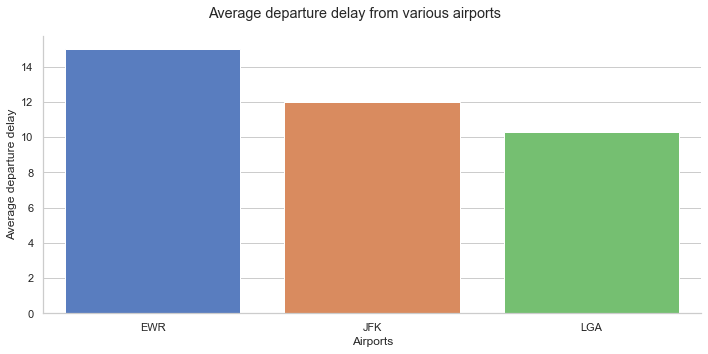

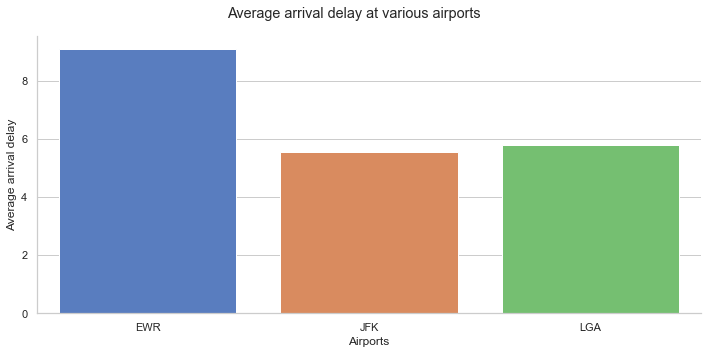

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


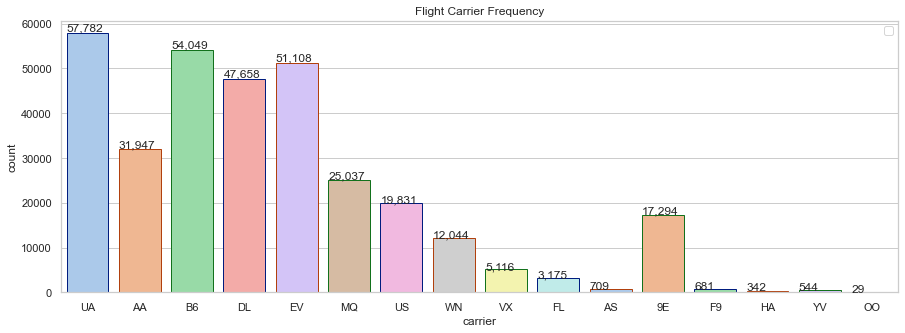

Text(0.5, 0, 'Origin Airports')

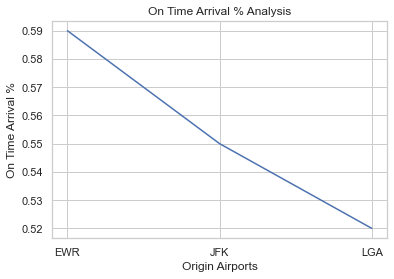

In [3]:
#Task 2 - Visualizations

#Function to draw bar graph
def draw_barplot(style_type, x_axis,y_axis,dataset_type,suptitle_type,xLabels_type,yLabels_type):        
    sns.set(style=style_type)         
    g = sns.catplot(x=x_axis, y=y_axis, data=dataset_type,aspect=2,height=5, kind="bar", palette="muted")
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle(suptitle_type)
    g.set_xlabels(xLabels_type)
    g.set_ylabels(yLabels_type) 
    plt.show() 

#Function to plot counts
def plot_CountPlot(X,Dataframe,Graph_title):
    fig = plt.figure(figsize=(15,5))
    ax = sns.countplot(x=X, data=Dataframe ,palette='pastel' ,edgecolor=sns.color_palette("dark", 3))
    ax.set_title(Graph_title)
    ax.legend(loc='upper right')
    for t in ax.patches:
        if (np.isnan(float(t.get_height()))):
            ax.annotate(0, (t.get_x(), 0))
        else:
            ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
    plt.show()  

#Flight statistics from different airports
dt=df.groupby(by='origin').count().reset_index().sort_values(by='year', ascending=False)
dt['flightsCount']=dt.year
draw_barplot(style_type='whitegrid',x_axis='origin',y_axis='flightsCount',xLabels_type='Airports', yLabels_type='Number of Flights', dataset_type=dt, suptitle_type="Flight statistics from different airports")

#Average departure delay from various airports
delay_Frame=df.groupby(by='origin').mean().reset_index().sort_values(by='year', ascending=False)
dt[['origin','dep_delay']]
draw_barplot(style_type='whitegrid',x_axis='origin',y_axis='dep_delay',xLabels_type='Airports', yLabels_type='Average departure delay', dataset_type=delay_Frame, suptitle_type="Average departure delay from various airports")

#Average arrival delay at various airports
delay_Frame=df.groupby(by='origin').mean().reset_index().sort_values(by='year', ascending=False)
dt[['origin','arr_delay']]
draw_barplot(style_type='whitegrid',x_axis='origin',y_axis='arr_delay',xLabels_type='Airports', yLabels_type='Average arrival delay', dataset_type=delay_Frame, suptitle_type="Average arrival delay at various airports")

#Flight carrier frequency
plot_CountPlot('carrier',df,'Flight Carrier Frequency')

#On Time Arrival Performance of Airports
ota=(df[df["arr_delay"]==0].groupby("origin").count()).loc[:,"year":"month"]
OnTimeArrivalPerc=np.round(((ota["year"]/ df["month"].count() ) * 100),decimals=2)
plt.plot(OnTimeArrivalPerc)
plt.title("On Time Arrival % Analysis")
plt.ylabel("On Time Arrival %")
plt.xlabel("Origin Airports")

In [4]:
#Task3 - Create new dataset pop_data

pop_data = df
pop_data.drop(axis=1,columns=['year','month','day','dep_delay','flight','tailnum','origin','dest','air_time','distance','hour','minute'],inplace=True)
filter_list=['UA']
pop_data_ua = pop_data[pop_data.carrier.isin(filter_list)]
pop_data_ua = pop_data_ua.sample(n=20000)
filter_list=['DL']
pop_data_dl = pop_data[pop_data.carrier.isin(filter_list)]
pop_data_dl = pop_data_dl.sample(n=20000)
pop_data = pop_data_ua.append(pop_data_dl)

C:\Users\megha\AppData\Local\Temp\ipykernel_25196\299247751.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pop_data = pop_data_ua.append(pop_data_dl)


In [5]:
#Task4 - Create datasets dl and us with 1000 samples

dl = pop_data_dl.sample(n=1000)
ua = pop_data_ua.sample(n=1000)

In [6]:
#Task5 - Create new data set samples
samples = dl.append(ua)

C:\Users\megha\AppData\Local\Temp\ipykernel_25196\3852991018.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  samples = dl.append(ua)


In [7]:
#Task6 - Calculate standard error and mean

dl_se = dl['arr_delay'].sem() #Standard Error of Mean for DL flights
dl_mean = dl['arr_delay'].mean() #Mean of DL flights
print("Mean of DL samples = ",dl_mean," Standard Error of DL samples = ",dl_se)
ua_se = ua['arr_delay'].sem() #Standard Error of Mean for UA flights
ua_mean = ua['arr_delay'].mean() #Mean of UA flights
print("Mean of UA samples = ",ua_mean," Standard Error of UA samples = ",ua_se)

Mean of DL samples =  -0.264  Standard Error of DL samples =  1.2123960607855038
Mean of UA samples =  2.44  Standard Error of UA samples =  1.2464180510398422


In [8]:
#Task7 - Find confidence intervals

dl_sd = np.std(dl['arr_delay']) #Standard deviation of Dl flights
ua_sd = np.std(ua['arr_delay']) #Standard deviation of UA flights
dl_t = t.ppf(0.975,df=999)
ua_t = t.ppf(0.975,df=999)
dl_ci_plus = dl_mean + dl_t*dl_se
dl_ci_minus = dl_mean - dl_t*dl_se
print('Lower value "DL"=',dl_ci_minus,'Mean Value "DL"=',dl_mean,'Upper value "DL"=',dl_ci_plus)
ua_ci_plus = ua_mean + ua_t*ua_se
ua_ci_minus = ua_mean + ua_t*ua_se
print('Lower value "UA"=',ua_ci_minus,'Mean Value "UA"=',ua_mean,'Upper value "UA"=',ua_ci_plus)

Lower value "DL"= -2.6431350573942627 Mean Value "DL"= -0.264 Upper value "DL"= 2.115135057394263
Lower value "UA"= 4.885897819460629 Mean Value "UA"= 2.44 Upper value "UA"= 4.885897819460629


In [9]:
#Task8 - T-TEST
import researchpy as rp
rp.ttest(group1= samples['arr_delay'][samples['carrier'] == 'DL'], group1_name= "DL",
         group2= samples['arr_delay'][samples['carrier'] == 'UA'], group2_name= "UA")

summary, results = rp.ttest(group1= samples['arr_delay'][samples['carrier'] == 'DL'], group1_name= "DL",
         group2= samples['arr_delay'][samples['carrier'] == 'UA'], group2_name= "UA")
print(summary)
print(results)

C:\Users\megha\anaconda3\lib\site-packages\researchpy\ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


   Variable       N   Mean         SD        SE  95% Conf.  Interval
0        DL  1000.0 -0.264  38.339330  1.212396  -2.643135  2.115135
1        UA  1000.0  2.440  39.415200  1.246418  -0.005898  4.885898
2  combined  2000.0  1.088  38.894777  0.869714  -0.617640  2.793640
          Independent t-test    results
0    Difference (DL - UA) =     -2.7040
1      Degrees of freedom =   1998.0000
2                       t =     -1.5551
3   Two side test p value =      0.1201
4  Difference < 0 p value =      0.0600
5  Difference > 0 p value =      0.9400
6               Cohen's d =     -0.0695
7               Hedge's g =     -0.0695
8          Glass's delta1 =     -0.0705
9        Point-Biserial r =     -0.0348


C:\Users\megha\anaconda3\lib\site-packages\researchpy\ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


In [11]:
#Conclusion
print("If the difference is positive, then average delay for DL flights is more delayed than UA flights. If the difference is negative, then the average delay for UA flights is more than DL flights depending on the random samples selected")

If the difference is positive, then average delay for DL flights is more delayed than UA flights. If the difference is negative, then the average delay for UA flights is more than DL flights depending on the random samples selected
